<a href="https://colab.research.google.com/github/andreYoo/Time-series-analysis-anomaly-detection/blob/main/%ED%95%AD%EB%A1%9C%ED%91%9C%EC%A7%80%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%A4%EC%8A%B5_Autoregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
# import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go # plotly graphical object
import os
import warnings
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# 구글 드라이브 마운트 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
weather_station_location = pd.read_csv("./drive/MyDrive/study/tmp_TB_WEATHER.csv")

In [ ]:
weather_station_id = weather_station_location['WIND_SPEED']

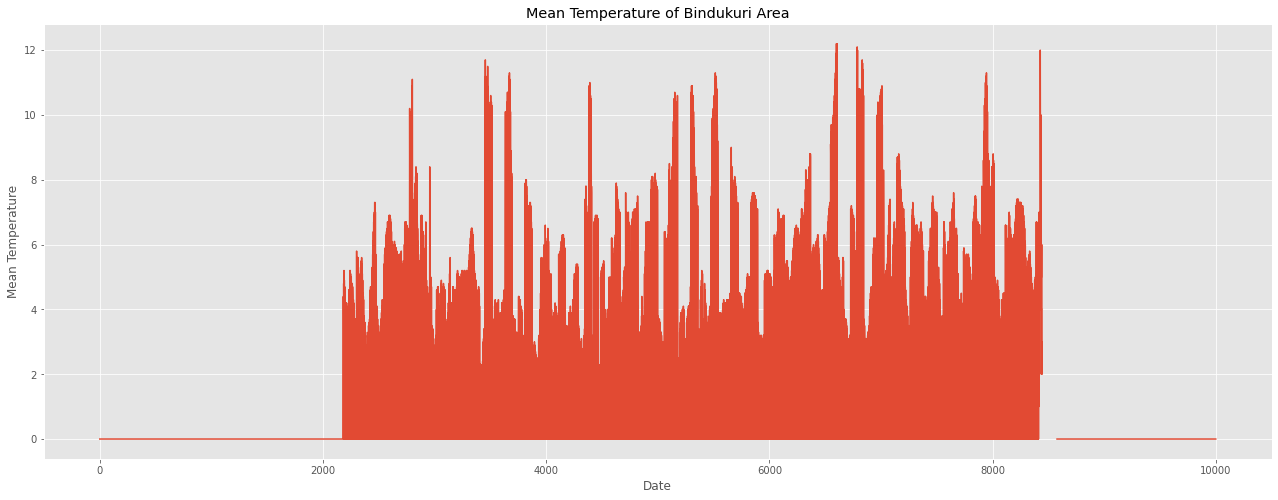

In [ ]:
plt.figure(figsize=(22,8))
plt.plot(weather_station_id)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

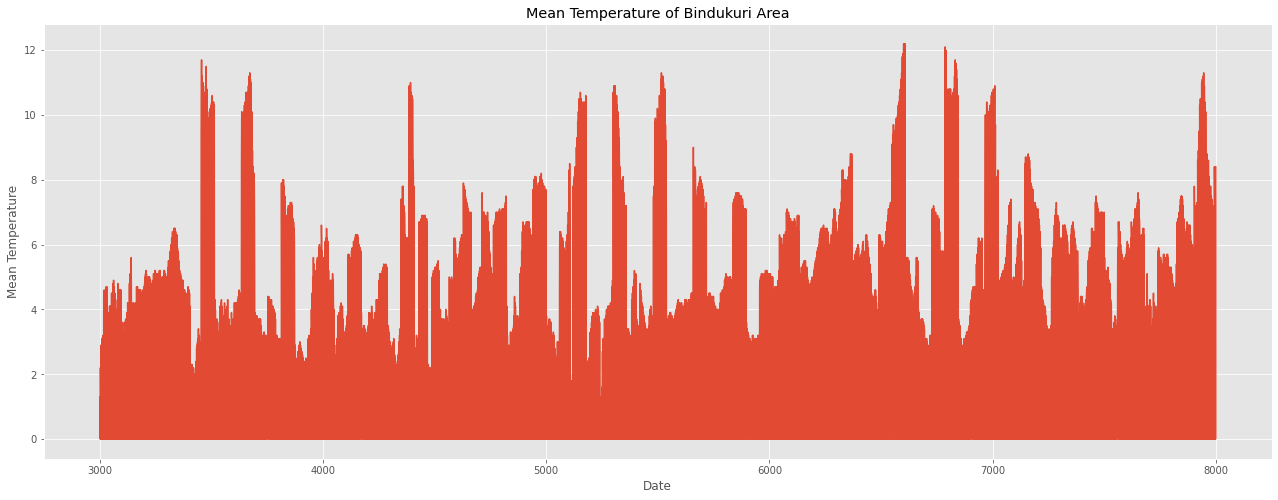

In [ ]:
plt.figure(figsize=(22,8))
plt.plot(weather_station_id[3000:8000])
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

<Figure size 432x288 with 0 Axes>

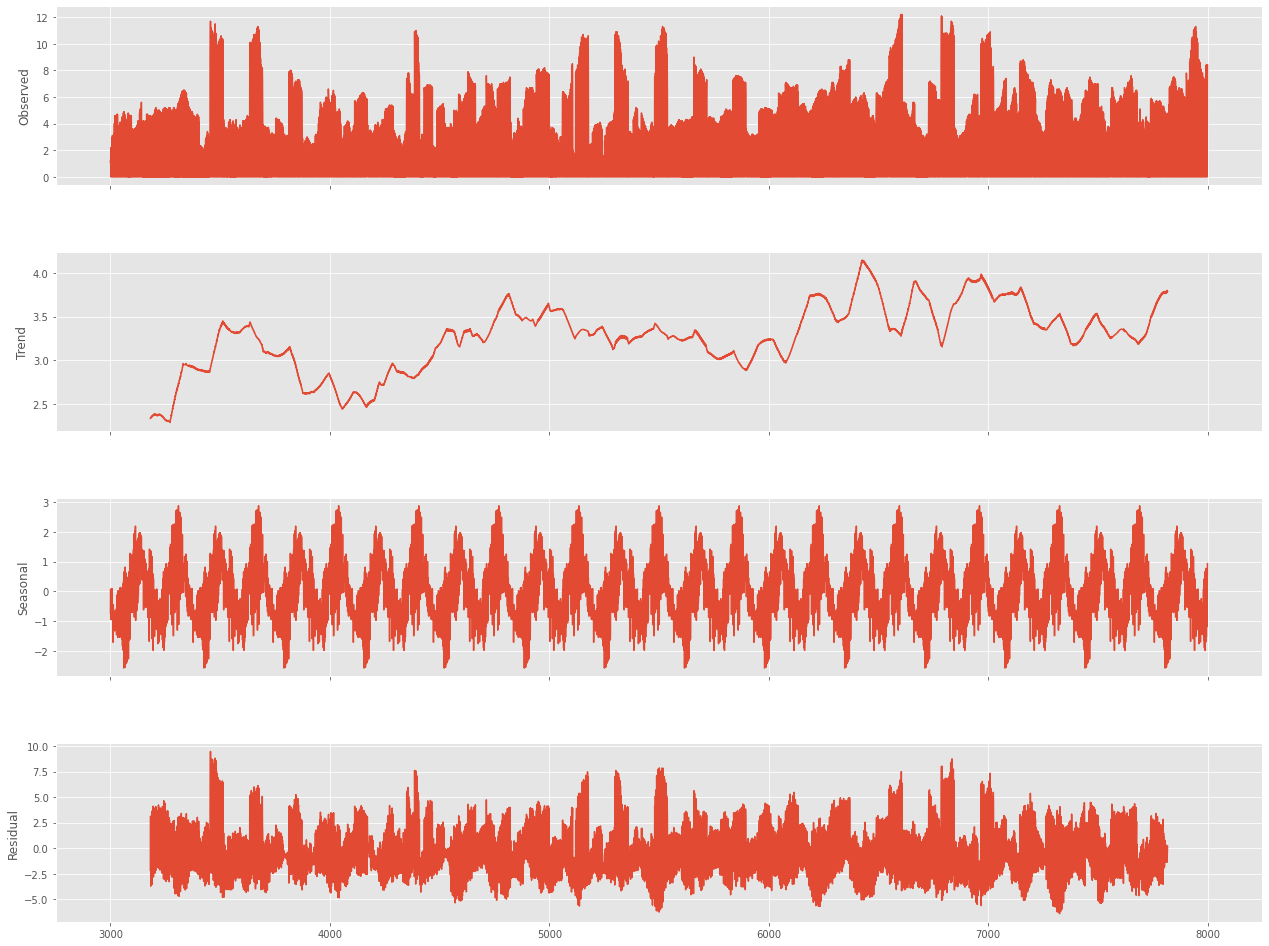

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts = weather_station_id[3000:8000]
result = seasonal_decompose(ts, model='additive', freq=365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

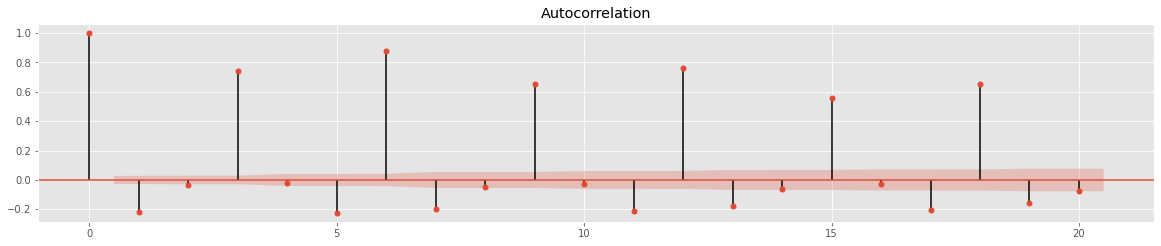

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.710253
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


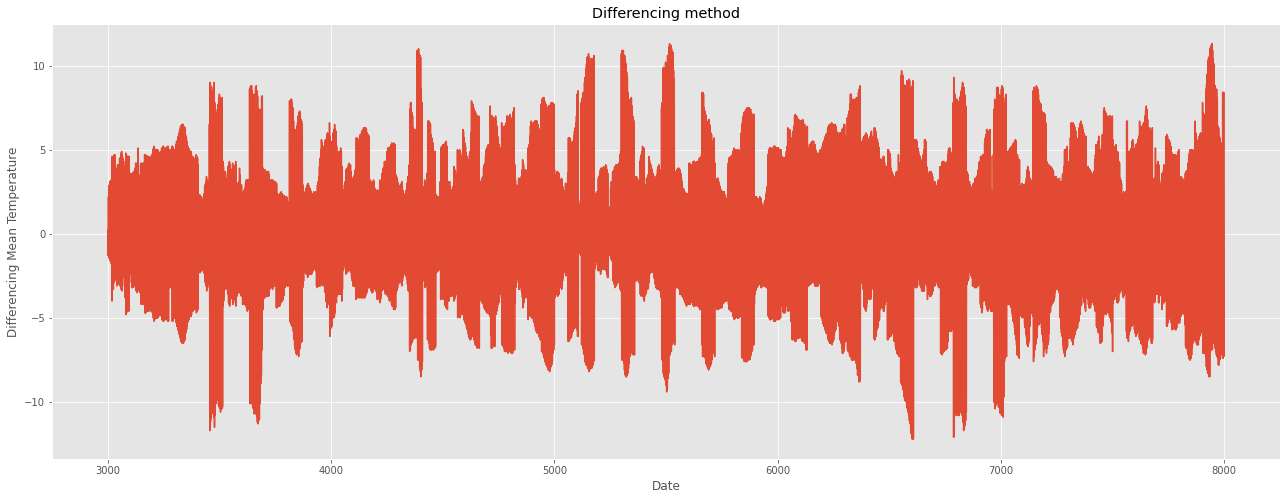

In [ ]:
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

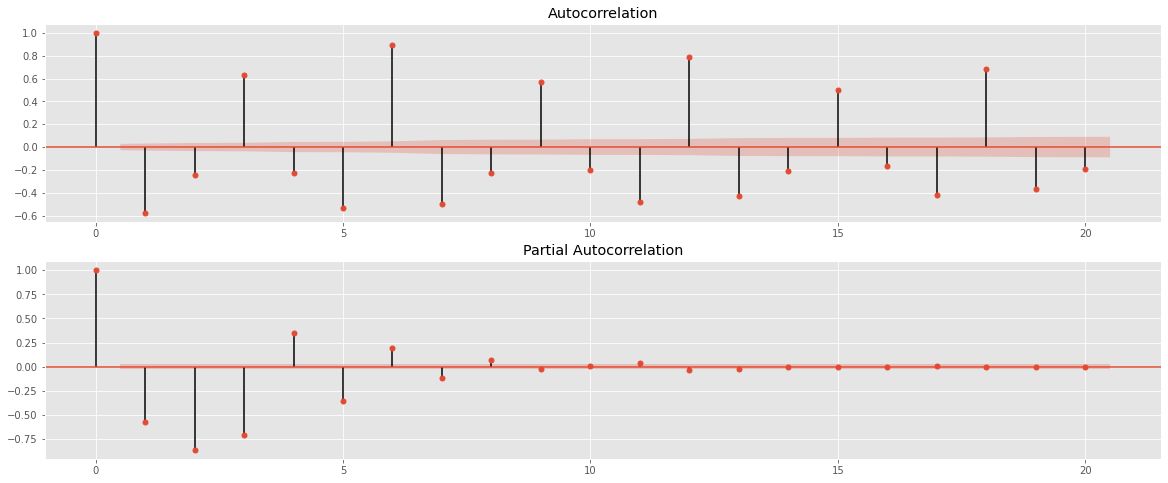

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)# , lags=40

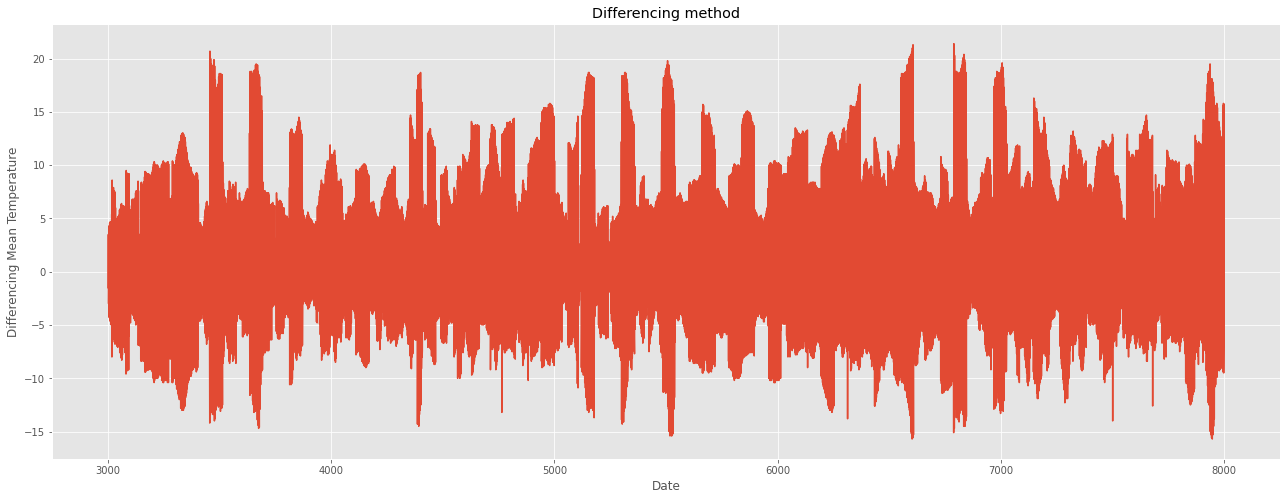

In [ ]:
ts_diff = ts - ts.shift()-(ts.shift()-ts.shift().shift())
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

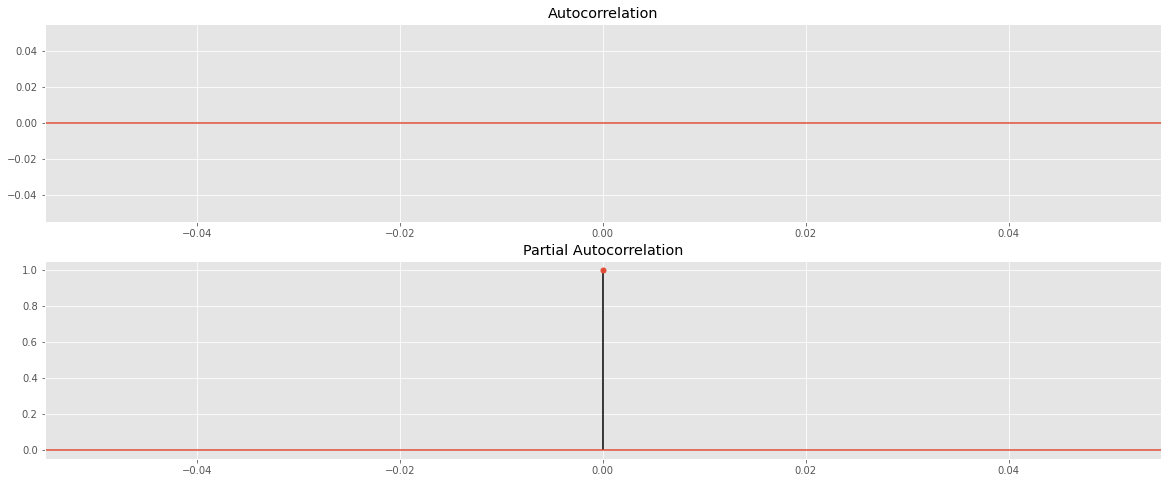

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax=ax2)# , lags=40

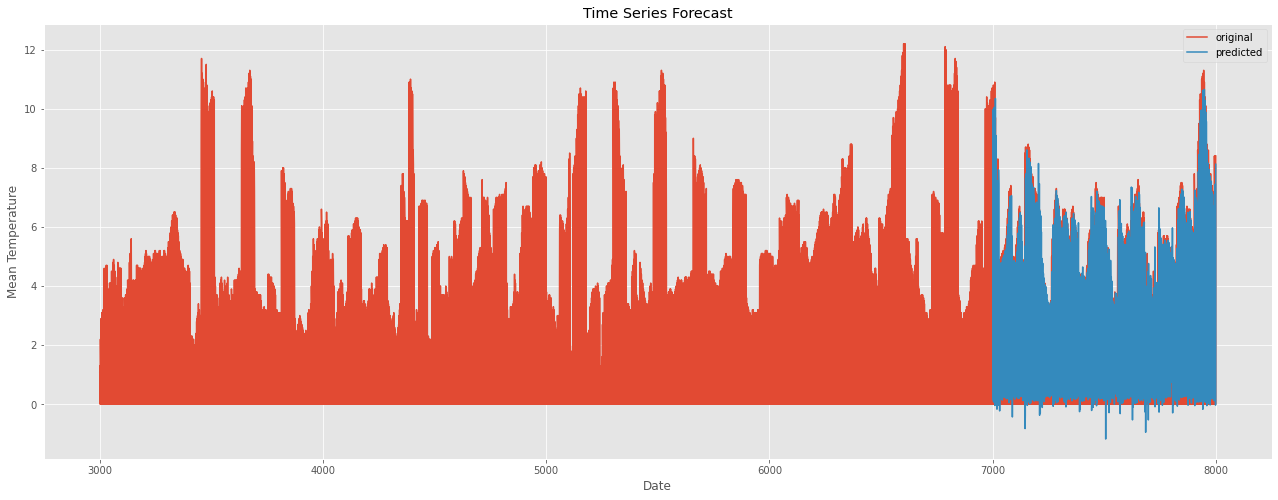

In [ ]:
from statsmodels.tsa.ar_model import AR
from pandas import datetime

# fit model
model = AR(ts)
model_fit = model.fit()
# predict
start_index = 4000
end_index = 4999
forecast = model_fit.predict(start=start_index, end=end_index, dynamic=False)
# visualization
plt.figure(figsize=(22,8))
plt.plot(ts,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

No handles with labels found to put in legend.


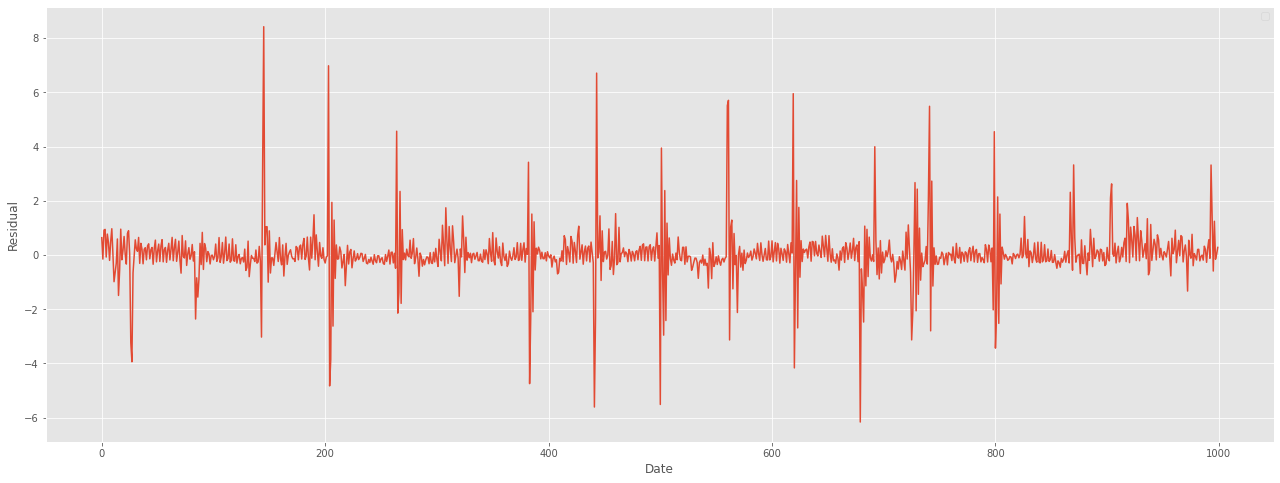

In [ ]:
resi = np.array(ts[start_index:end_index+1]) -np.array(forecast)
plt.figure(figsize=(22,8))
plt.plot(resi)
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

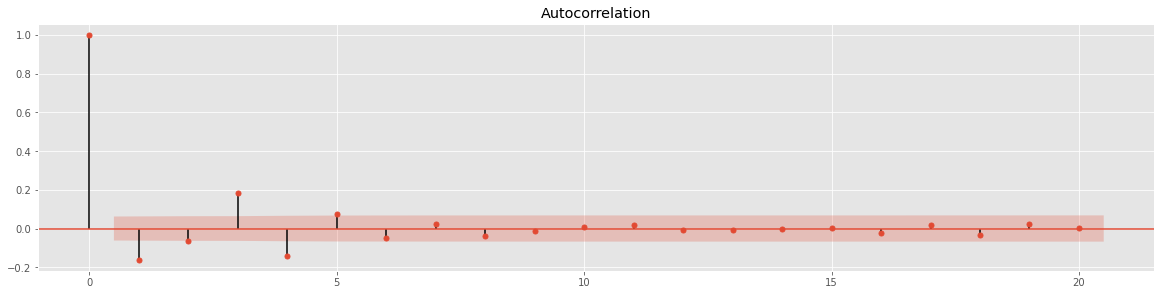

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resi,lags=20,ax=ax1)


In [ ]:
from sklearn import metrics
def scoring(y_true, y_pred):
  r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
  # mae = round(metrics.mean_absolute_error(y_true, y_pred),3)
  corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
  mape = round(
  metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
  rmse = round(metrics.mean_squared_error(y_true, y_pred,
  squared=False), 3)
  df = pd.DataFrame({
    'R2': r2,
    "Corr": corr,
    "RMSE": rmse,
    "MAPE": mape
    },
    index=[0])
  return df

In [ ]:
scoring(np.array(ts[start_index:end_index+1]),np.array(forecast))

,R2,Corr,RMSE,MAPE
0,88.352,0.94,1.006,6.567070e+16
